In [194]:
import tensorflow as tf
import keras
import numpy as np
import sktime
import matplotlib.pyplot as plt
import pandas as pd

## Previsão de series temporais

In [195]:
def generate_time_series_data(batch_size, n_steps):
    # gerando dados de séries temporais sintéticos
    # com duas frequências e um deslocamento
    freq1, freq2, offeset1, offset2 = np.random.rand(4, batch_size, 1)
    
    # criando uma grade de tempo
    time = tf.linspace(0.0, 1.0, n_steps)

    # gerando a série temporal
    # adicionando uma frequência
    series = 0.5 * tf.sin((time - offeset1) * (freq1 * 10 + 10))
    # adicionando uma segunda frequência
    series += 0.2 * tf.sin((time - offset2) * (freq2 * 20 + 20))
    # adicionando ruído
    series += 0.1 * (tf.random.normal((batch_size, n_steps), dtype=tf.float32) - 0.5)

    return series[..., tf.newaxis] # adicionando uma dimensão para o canal

In [196]:
n_steps = 50

series = generate_time_series_data(batch_size=10000, n_steps=n_steps)

In [197]:
series = series.numpy()  # Convertendo para numpy array para manipulação posterior

In [198]:
x_train, y_train = series[:7000, :n_steps], series[:7000, -1]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
x_test, y_test = series[9000:, :n_steps], series[9000:, -1]

### Baseline de métricas

Previsão ingenua : é predizer o último valor de cada série

In [199]:
np.mean(
    keras.losses.mean_squared_error(x_valid[:, -1], y_valid)
)

np.float32(0.0)

## Implementando uma RNN Simples

In [200]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])  
])

In [201]:
model.compile(
    loss=keras.losses.mean_squared_error,
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=[keras.metrics.MeanAbsoluteError()]
)
history = model.fit( x_train, y_train, 
                    validation_data=(x_valid, y_valid),
                    epochs=20,
                    batch_size=32)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - loss: 0.0721 - mean_absolute_error: 0.2039 - val_loss: 0.0030 - val_mean_absolute_error: 0.0451
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0022 - mean_absolute_error: 0.0374 - val_loss: 8.8625e-04 - val_mean_absolute_error: 0.0226
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 7.8861e-04 - mean_absolute_error: 0.0209 - val_loss: 5.6623e-04 - val_mean_absolute_error: 0.0172
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 5.3871e-04 - mean_absolute_error: 0.0170 - val_loss: 5.1931e-04 - val_mean_absolute_error: 0.0168
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 5.2210e-04 - mean_absolute_error: 0.0168 - val_loss: 5.2515e-04 - val_mean_absolute_error: 0.0173
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5.5019e-04 - mean_absolute_error: 0.0171 - val_loss: 5.2863e-04 - val_mean_absolute_error: 0.0177
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - lo

<Axes: >

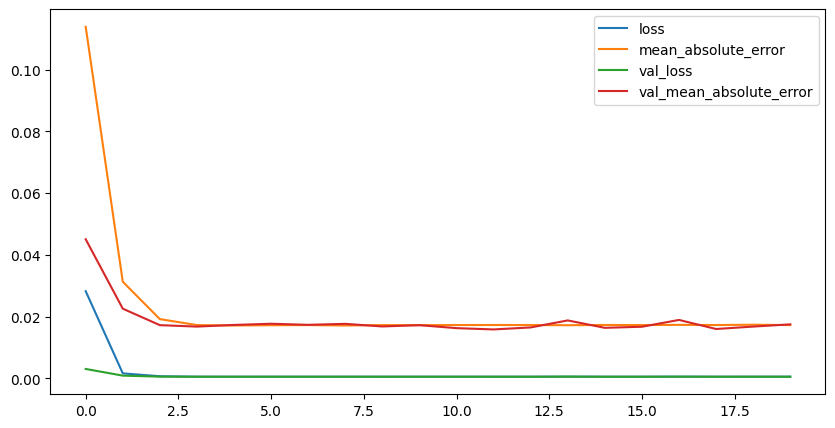

In [202]:
pd.DataFrame(history.history).plot(figsize=(10, 5))

In [203]:
for i in range(10):
    y_pred = model.predict(x_test[i:i+1])

    keras.layers.SimpleRNN(50, return_sequences=True),


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


## RNNs Profundas

In [204]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, input_shape=[None, 1], return_sequences=True),  
    keras.layers.SimpleRNN(20, return_sequences=True),  
    keras.layers.SimpleRNN(1),  
])

c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


`return_seguences` :Retorna toda a sequência de saídas ocultas, uma para cada passo de tempo.
> Faça questão de usar `return_sequences = True` para todas as camadas recorrentes, exceto a última.   

In [205]:
model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=[keras.metrics.MeanAbsoluteError()]
)

In [206]:
history = model.fit( x_train, y_train, 
                    validation_data=(x_valid, y_valid),
                    epochs=20,
                    batch_size=32
                    )

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - loss: 0.0154 - mean_absolute_error: 0.0720 - val_loss: 8.3378e-04 - val_mean_absolute_error: 0.0223
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 7.6176e-04 - mean_absolute_error: 0.0204 - val_loss: 7.5424e-04 - val_mean_absolute_error: 0.0207
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 6.4612e-04 - mean_absolute_error: 0.0191 - val_loss: 0.0011 - val_mean_absolute_error: 0.0255
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 6.3303e-04 - mean_absolute_error: 0.0189 - val_loss: 4.5988e-04 - val_mean_absolute_error: 0.0155
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 4.6118e-04 - mean_absolute_error: 0.0160 - val_loss: 7.9612e-04 - val_mean_absolute_error: 0.0226
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 5.0293e-04 - mean_absolute_error: 0.0167 - val_loss: 5.0350e-04 - val_mean_absolute_error: 0.0162
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step 

<Axes: >

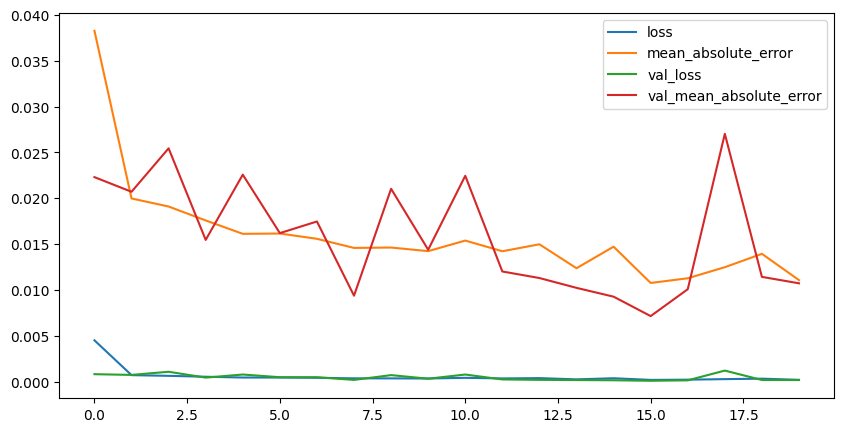

In [207]:
pd.DataFrame(history.history).plot(figsize=(10, 5))

In [208]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, input_shape=[None, 1], return_sequences=True),  
    keras.layers.SimpleRNN(20),  
    keras.layers.Dense(1),  
])

c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


> Como o  keras.layers.SimpleRNN(20) virou a última camada é removido o return_seguences

In [209]:
model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=[keras.metrics.MeanAbsoluteError()]
)
history = model.fit( x_train, y_train, 
                    validation_data=(x_valid, y_valid),
                    epochs=20,
                    batch_size=32)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.0336 - mean_absolute_error: 0.1004 - val_loss: 3.6625e-04 - val_mean_absolute_error: 0.0149
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 3.2957e-04 - mean_absolute_error: 0.0142 - val_loss: 1.7781e-04 - val_mean_absolute_error: 0.0102
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 1.9191e-04 - mean_absolute_error: 0.0107 - val_loss: 1.2182e-04 - val_mean_absolute_error: 0.0085
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 1.2557e-04 - mean_absolute_error: 0.0086 - val_loss: 1.8314e-04 - val_mean_absolute_error: 0.0112
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1.2440e-04 - mean_absolute_error: 0.0086 - val_loss: 5.8104e-05 - val_mean_absolute_error: 0.0055
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 8.5278e-05 - mean_absolute_error: 0.0071 - val_loss: 4.6149e-05 - val_mean_absolute_error: 0.0051
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/s

<Axes: >

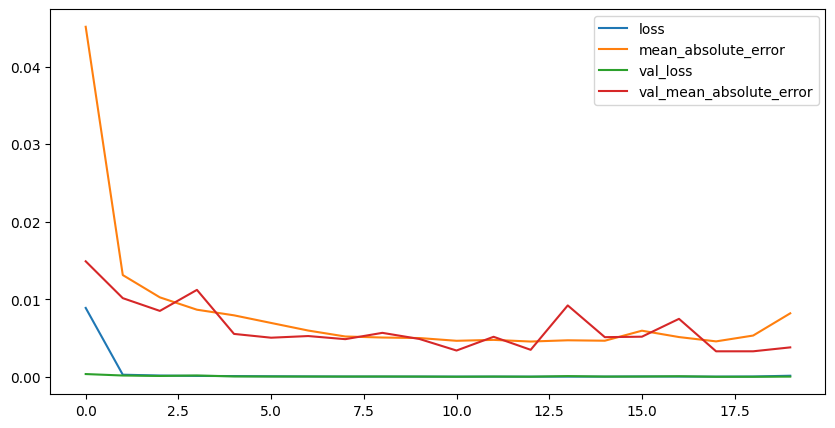

In [210]:
pd.DataFrame(history.history).plot(figsize=(10, 5))

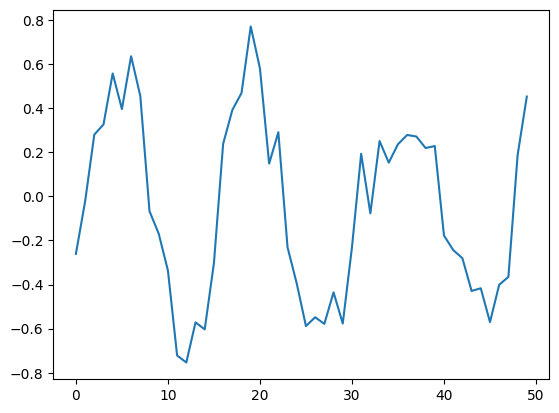

In [211]:
plt.plot(x_test[1, :, 0], label='Série Original')

In [212]:
series = generate_time_series_data(batch_size=1, n_steps=n_steps + 10)

x_new, y_new = series[:, :n_steps], series[:, -1]
X = x_new 
for step in range(n_steps):
    ypred  = model.predict(X[:, step:step + 1])[:, np.newaxis, :]
    X = np.concatenate([X, ypred], axis=1)

y_pred_ = X[:, n_steps:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━

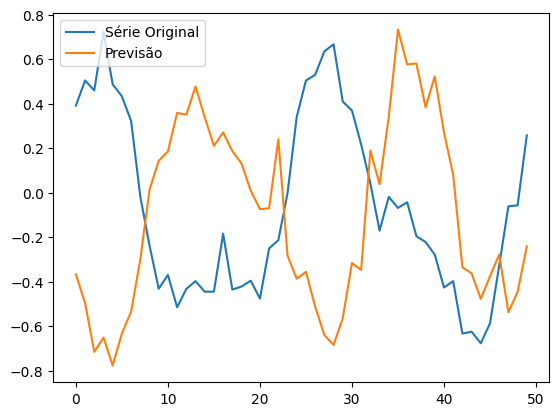

In [213]:
#plot 
plt.plot(x_test[0, :, 0], label='Série Original')
plt.plot(y_pred_[0, :, 0], label='Previsão')
plt.legend()

### Exemplo

c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


[[[0.45745605]
  [0.28863225]
  [0.06420686]
  [0.82983903]
  [0.33321165]
  [0.47507444]
  [0.82886773]
  [0.42663946]
  [0.31292658]
  [0.49670395]]]


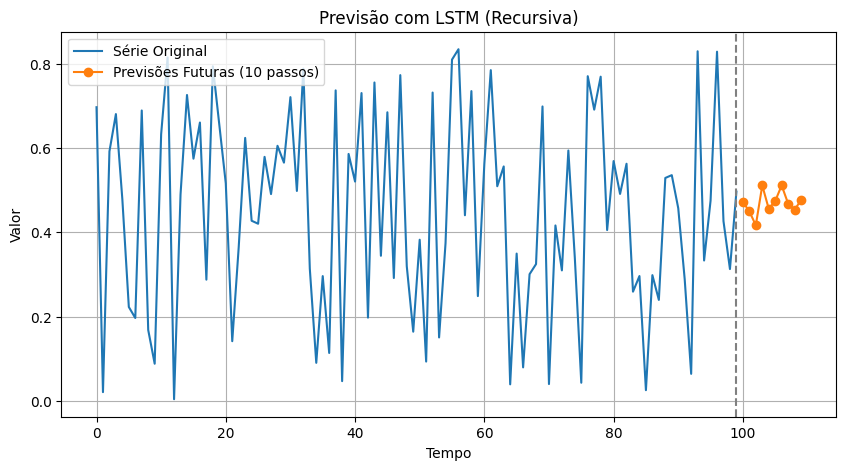

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# 1. Criar a série temporal
serie = np.sin(np.random.RandomState(10).rand(100)) # dados simples de 0 a 99

# 2. Definir parâmetros
lookback = 10
batch_size = 8

# 3. Separar treino e teste
tamanho_treino = int(len(serie) * 0.8)
serie_treino = serie[:tamanho_treino]
serie_teste = serie[tamanho_treino - lookback:]  # incluir janela

# 4. Criar geradores automáticos
train_gen = TimeseriesGenerator(serie_treino, serie_treino,
                                 length=lookback, batch_size=batch_size)

test_gen = TimeseriesGenerator(serie_teste, serie_teste,
                                length=lookback, batch_size=batch_size)

# 5. Criar e treinar o modelo LSTM
model = Sequential([
    keras.layers.SimpleRNN(50, return_sequences=True, input_shape=(lookback, 1)),
    keras.layers.SimpleRNN(50, return_sequences=True),
    keras.layers.SimpleRNN(50, return_sequences=True),

    keras.layers.TimeDistributed(Dense(1)),
])
model.compile(optimizer='adam', loss='mse')
model.fit(train_gen, epochs=20, verbose=0)

# 6. Prever os 10 próximos passos com abordagem recursiva
input_seq = serie[-lookback:].reshape((1, lookback, 1))
print(serie[-lookback:].reshape((1, lookback, 1)))
previsoes = []

for _ in range(10):
    pred = model.predict(input_seq, verbose=0)
    previsoes.append(pred[0][0])
    
    # Atualiza a sequência com a nova previsão
    nova_seq = np.append(input_seq[0, 1:], pred[0][0])
    input_seq = nova_seq.reshape((1, lookback, 1))

# 7. Plotar resultados
plt.figure(figsize=(10, 5))
plt.plot(serie, label="Série Original")
plt.plot(np.arange(100, 110), previsoes, label="Previsões Futuras (10 passos)", marker='o')
plt.axvline(x=99, color='gray', linestyle='--')  # marca fim dos dados conhecidos
plt.legend()
plt.title("Previsão com LSTM (Recursiva)")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.grid(True)
plt.show()


## Exemplo 2

In [215]:
import yfinance 

In [216]:
data = yfinance.download("AAPL", start="2020-01-01", end="2021-01-01")

C:\Users\mateu\AppData\Local\Temp\ipykernel_11428\3619911942.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yfinance.download("AAPL", start="2020-01-01", end="2021-01-01")
[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'AAPL - Últimos 100 dias'}, xlabel='Date'>

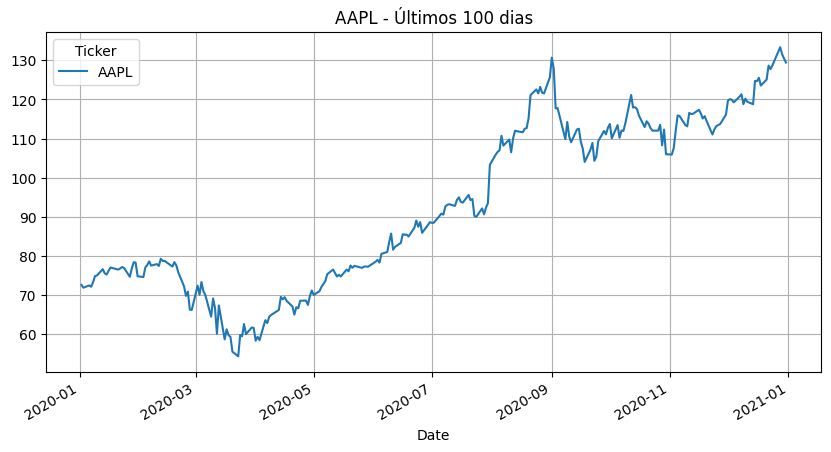

In [217]:
data['Close'].plot(figsize=(10, 5), title='AAPL - Últimos 100 dias', grid=True)

In [218]:
series = data['Close'].values

In [219]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
series = scaler.fit_transform(series.reshape(-1, 1))

In [220]:
series.shape

(253, 1)

In [221]:
janela = 5

index_ = int(len(serie) * 0.8)

train_ = series[:index_]

test_  = series[index_-janela:]

train = TimeseriesGenerator(
    train_, train_,
    length=janela, batch_size=32
)
test = TimeseriesGenerator(
    test_, test_,
    length=janela, batch_size=32
)

In [222]:
index_-janela

75

In [223]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(50, input_shape=[None, 1], return_sequences=True),  
    keras.layers.SimpleRNN(50, return_sequences=True),  
    keras.layers.SimpleRNN(50, return_sequences=True),
    keras.layers.SimpleRNN(50, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(1)),
])
model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=[keras.metrics.MeanAbsoluteError()]
)
history = model.fit(train, 
                    epochs=50,
                    validation_data=test
)

c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 830ms/step - loss: 2.1339 - mean_absolute_error: 0.8111 - val_loss: 0.5674 - val_mean_absolute_error: 0.5051
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0487 - mean_absolute_error: 0.1623 - val_loss: 0.2915 - val_mean_absolute_error: 0.4590
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0686 - mean_absolute_error: 0.1855 - val_loss: 0.1835 - val_mean_absolute_error: 0.3609
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0191 - mean_absolute_error: 0.1079 - val_loss: 0.6040 - val_mean_absolute_error: 0.6369
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0486 - mean_absolute_error: 0.1672 - val_loss: 0.3005 - val_mean_absolute_error: 0.4701
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0522 - mean_absolute_error: 0.1617 - val_loss: 0.2360 - val_mean_absolute_error: 0.4356
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0110 - mean_absolute_error: 0.0859 - val_loss: 0.0486 - 

<Axes: >

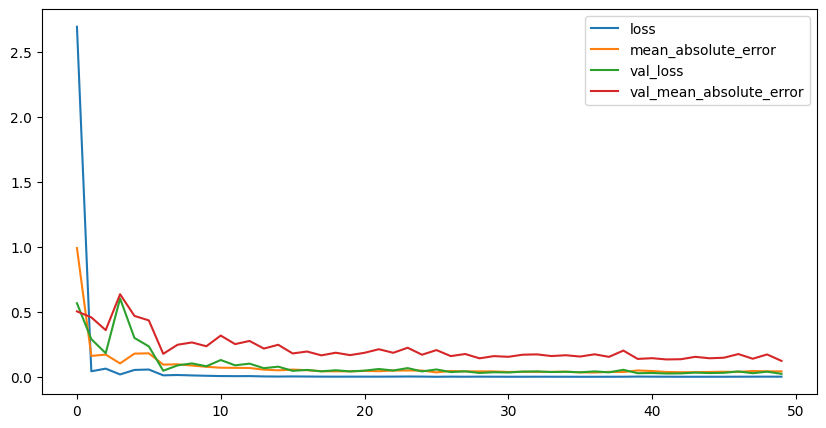

In [224]:
pd.DataFrame(history.history).plot(figsize=(10, 5))

In [225]:
input_seq = series[-janela:].reshape((1, janela, 1))
y_pred = model.predict(input_seq)

lista = []
for i in range(10):
    y_pred = model.predict(input_seq)
    input_seq = np.append(input_seq[:, 1:, :], y_pred[:, -1:, :], axis=1)
    lista.append(y_pred[0, -1, 0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


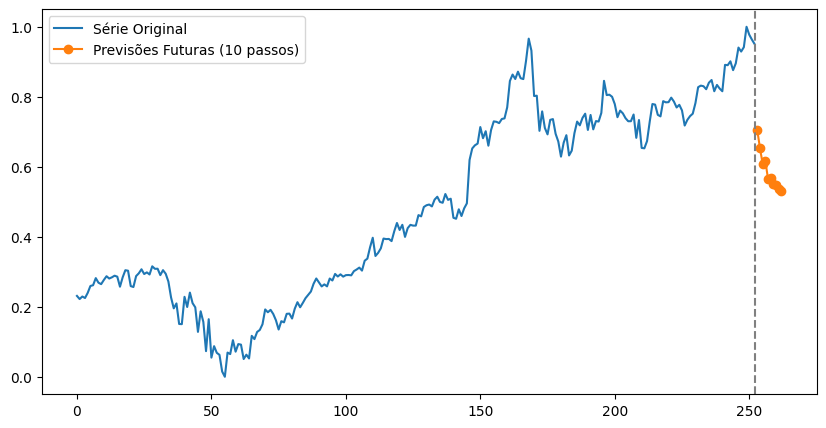

In [226]:
plt.figure(figsize=(10, 5))
plt.plot(series, label='Série Original')
plt.plot(np.arange(len(series), len(series) + 10), lista, label='Previsões Futuras (10 passos)', marker='o')
plt.axvline(x=len(series) - 1, color='gray', linestyle='--')  # marca fim dos dados conhecidos
plt.legend()